# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import datatime to convert from unix UTC time to readable time based on timezone
from datetime import datetime, timezone, timedelta

print(weather_api_key)

79b16ed188df002c353a4eb256c8fb74


### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [34]:
# Set the API base URL

url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"{city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.fromtimestamp(city_weather["dt"], 
                                           tz=timezone.utc).astimezone(
                                               timezone(timedelta(seconds=city_weather["timezone"]))).strftime(
                                                   '%d-%m-%Y') 
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 2 of Set 1 | ebon
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | whitehorse
Processing Record 6 of Set 1 | banamba
Processing Record 7 of Set 1 | la passe
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | ghat
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | akureyri
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | uturoa
Processing Record 15 of Set 1 | kapa'a
Processing Record 16 of Set 1 | hammerfest
Processing Record 17 of Set 1 | hasaki
Processing Record 18 of Set 1 | belmonte
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | selfoss
Processing Record 21 of Set 1 | khandyga
Processing Record 22 of Set 1 | fu

In [43]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# # Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [44]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ebon,4.5820,168.6964,300.50,81,72,10.74,MH,04-02-2025
1,bethel,41.3712,-73.4140,278.83,75,75,4.12,US,03-02-2025
2,stanley,54.8680,-1.6985,281.16,77,40,7.72,GB,03-02-2025
3,whitehorse,60.7161,-135.0538,256.58,85,75,1.54,CA,03-02-2025
4,banamba,13.5500,-7.4500,295.21,15,93,3.38,ML,03-02-2025


In [45]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ebon,4.5820,168.6964,300.50,81,72,10.74,MH,04-02-2025
1,bethel,41.3712,-73.4140,278.83,75,75,4.12,US,03-02-2025
2,stanley,54.8680,-1.6985,281.16,77,40,7.72,GB,03-02-2025
3,whitehorse,60.7161,-135.0538,256.58,85,75,1.54,CA,03-02-2025
4,banamba,13.5500,-7.4500,295.21,15,93,3.38,ML,03-02-2025


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

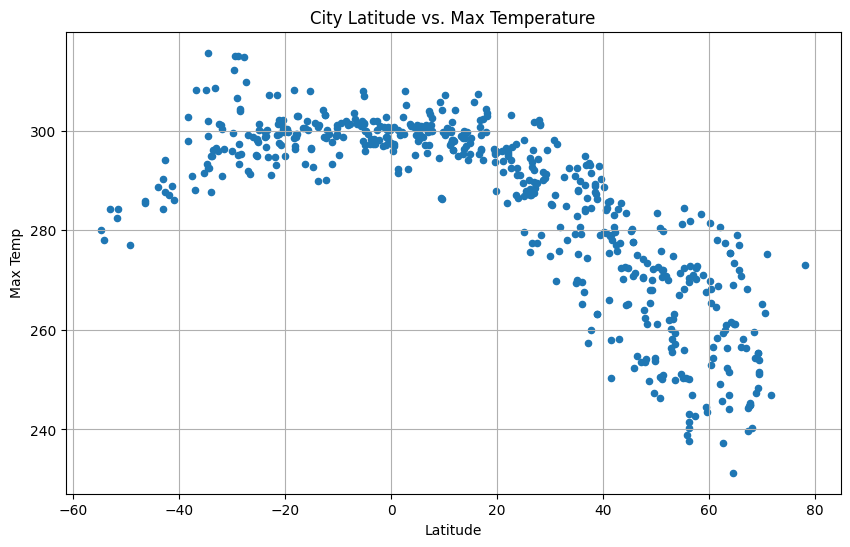

In [47]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", 
                       title="City Latitude vs. Max Temperature", grid=True, figsize=(10,6))

# Incorporate the other graph properties
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

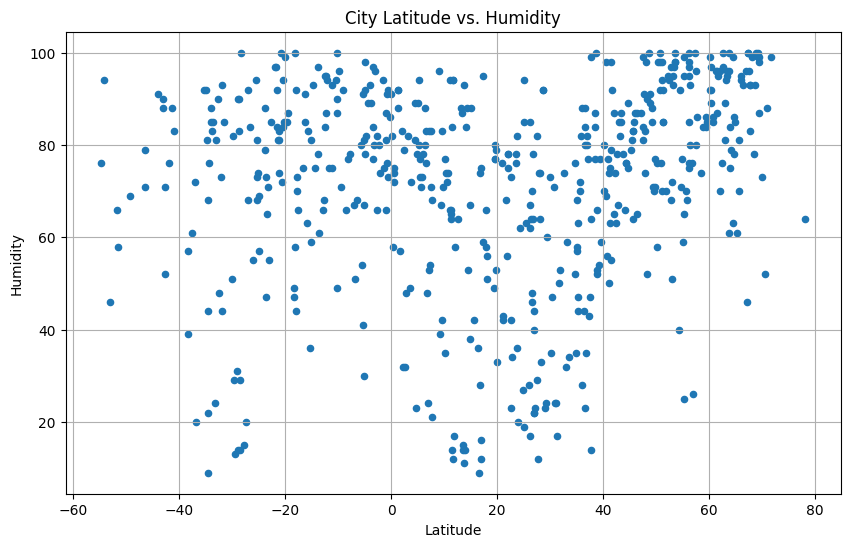

In [48]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", title="City Latitude vs. Humidity", grid=True, figsize=(10,6))


# Incorporate the other graph properties
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

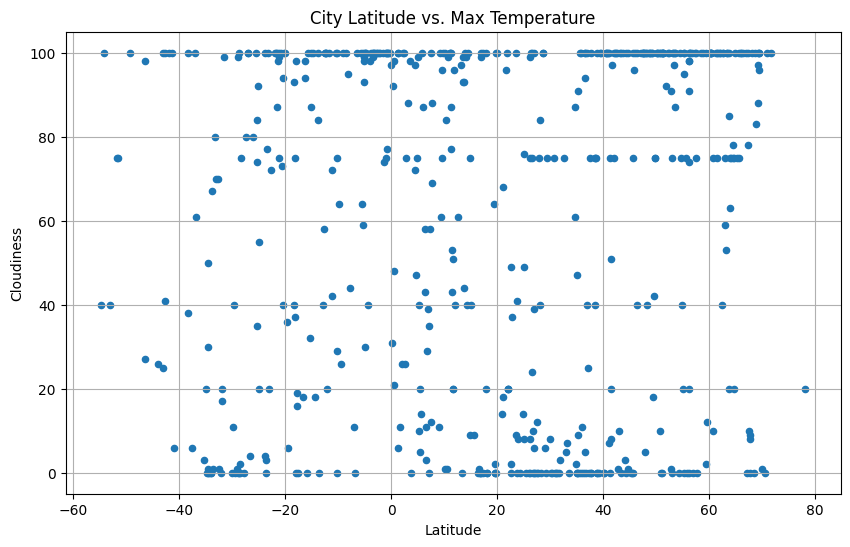

In [49]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", 
                       title="City Latitude vs. Max Temperature", grid=True, figsize=(10,6))


# Incorporate the other graph properties
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

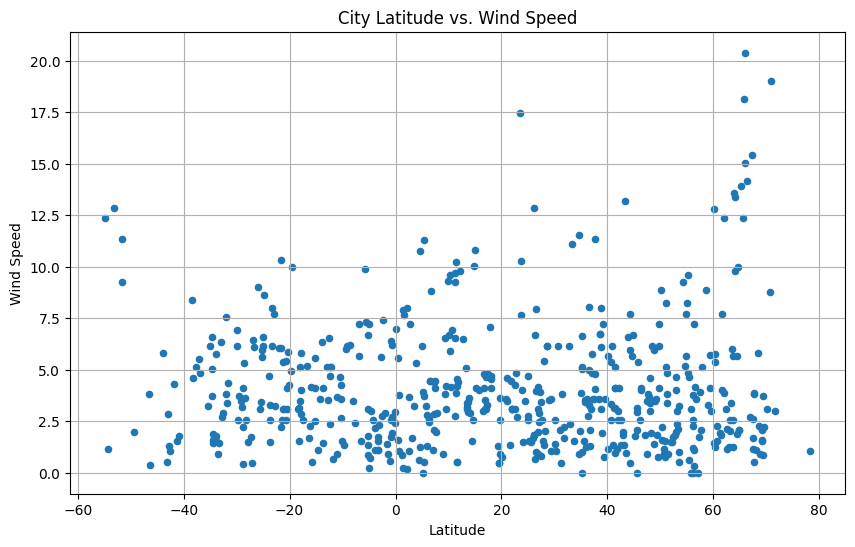

In [50]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", 
                       title="City Latitude vs. Wind Speed", grid=True, figsize=(10,6))

# Incorporate the other graph properties
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_regress(x_values, slope, intercept):
    regress_values = x_values * slope + intercept
    # line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values

latitude = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
max_temp_regress = linregress(latitude, max_temp)
humidity_regress = linregress(latitude, humidity)
cloudiness_regress = linregress(latitude, cloudiness)
wind_speed_regress = linregress(latitude, wind_speed)


# NOTE - Scatterplot creation
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($100,000)')
# plt.show()

In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ebon,4.5820,168.6964,300.50,81,72,10.74,MH,04-02-2025
1,bethel,41.3712,-73.4140,278.83,75,75,4.12,US,03-02-2025
2,stanley,54.8680,-1.6985,281.16,77,40,7.72,GB,03-02-2025
3,whitehorse,60.7161,-135.0538,256.58,85,75,1.54,CA,03-02-2025
4,banamba,13.5500,-7.4500,295.21,15,93,3.38,ML,03-02-2025


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE